# Final Project Submission


* Student name: Asad Rahman
* Student pace: full time
* Scheduled project review date/time: 8/20/19
* Instructor name: Victor Geislinger


## Table of Contents

[1. Introduction](#Introduction)

[2. Preparing the Model](#Preparing-the-Model)

[3. Baseline Model](#Baseline-Model)

[4. CNN](#Convolutional-Neural-Network)

[5. Pretrained Network](#Pretrained-Network)

[6. Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Introduction

#### Project Aims


      
In the medical field, it takes specialists time and effort in making diagnosis through medical imaging. Through the efficiency of neural networks, this process has the potential to be just as precise, if not more, while reducing the time necessary to draw a conclusion. The images obtained and which are involved in the training of our network testing are Optical Coherence Tomography (OCT) images of the retina. Detectible in these scans are normal retinal images, and then those containing Drusen, Diabetic Macular Edema, or Choroidal Neovascularization.


###### Dataset

The dataset used in this project was downloaded from https://data.mendeley.com/datasets/rscbjbr9sj/3

It contains validated retinal OCT images

### Preparing the Model

###### Import the libraries

We start by importing some of the packages and modules that we intend to use.

In [97]:
#These are libraries that will be used throughout the Notebook
import os, shutil, random
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from keras import optimizers

np.random.seed(123)

######  Loading the Images

The full dataset is composed of training and test images, each containing the four possible diagnoses sought out in our OCT images. Our validation set will be created later on by a random split.

In [98]:
train_folder = "OCT2017/OCT2017/train"
train_cnv = "OCT2017/OCT2017/train/CNV"
train_dme = "OCT2017/OCT2017/train/DME"
train_drusen = "OCT2017/OCT2017/train/DRUSEN"
train_normal = "OCT2017/OCT2017/train/NORMAL"

test_folder = "OCT2017/OCT2017/test"
test_cnv = "OCT2017/OCT2017/test/CNV"
test_dme = "OCT2017/OCT2017/test/DME"
test_drusen = "OCT2017/OCT2017/test/DRUSEN"
test_normal = "OCT2017/OCT2017/test/NORMAL"

###### Exploring the Data

In [99]:
train_n_len = len(os.listdir(train_normal))
test_n_len = len(os.listdir(test_normal))
print("There are", train_n_len, "normal images in the training set, as well as", test_n_len, "normal images in the testing set.")

There are 26315 normal images in the training set, as well as 250 normal images in the testing set.


In [100]:
train_cnv_len = len(os.listdir(train_cnv))
test_cnv_len = len(os.listdir(test_cnv))
print("There are", train_cnv_len, "Choroidal Neovascularization images in the training set, as well as", test_cnv_len, "Choroidal Neovascularization images in the testing set.")

There are 37205 Choroidal Neovascularization images in the training set, as well as 250 Choroidal Neovascularization images in the testing set.


In [101]:
train_dme_len = len(os.listdir(train_dme))
test_dme_len = len(os.listdir(test_dme))
print("There are", train_dme_len, "Diabetic Macular Edema images in the training set, as well as", test_dme_len, "Diabetic Macular Edema images in the testing set.")

There are 11348 Diabetic Macular Edema images in the training set, as well as 250 Diabetic Macular Edema images in the testing set.


In [102]:
train_drusen_len = len(os.listdir(train_drusen))
test_drusen_len= len(os.listdir(test_drusen))
print("There are", train_drusen_len, "Drusen images in the training set, as well as", test_drusen_len, "Drusen images in the testing set.")

There are 8616 Drusen images in the training set, as well as 250 Drusen images in the testing set.


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

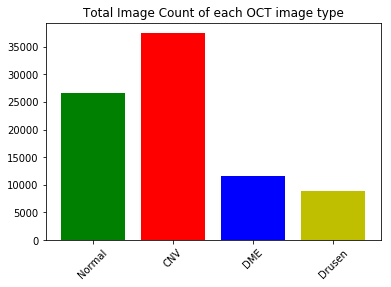

In [103]:
total_n = train_n_len + test_n_len
total_cnv = train_cnv_len + test_cnv_len
total_dme = train_dme_len + test_dme_len
total_drusen = train_drusen_len + test_drusen_len

plt.title("Total Image Count of each OCT image type")
plt.bar(["Normal","CNV","DME","Drusen"],[total_n,total_cnv,total_dme,total_drusen],color = ["g","r","b","y"])
plt.xticks(rotation=45)

We see an uneven distribution of the images. Although this shouldn't affect our outcomes, it's worth noting for case scenarios where one outcome is being over or under predicted.

NORMAL
D:\Documents\flatiron\final project 5\OCT2017\OCT2017\test\DME
NORMAL-2973935-1.jpeg


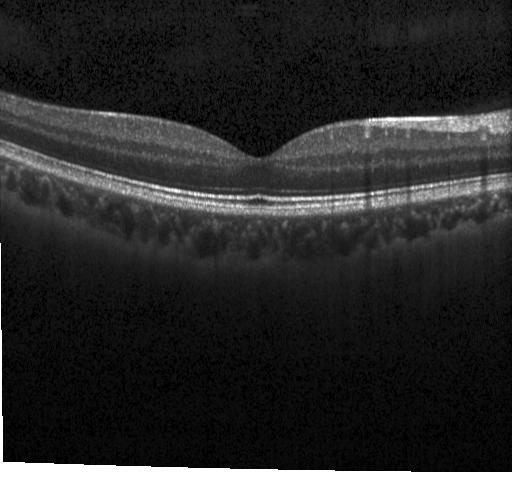

CNV
D:\Documents\flatiron\final project 5\OCT2017\OCT2017\test\DME
CNV-1731375-2.jpeg


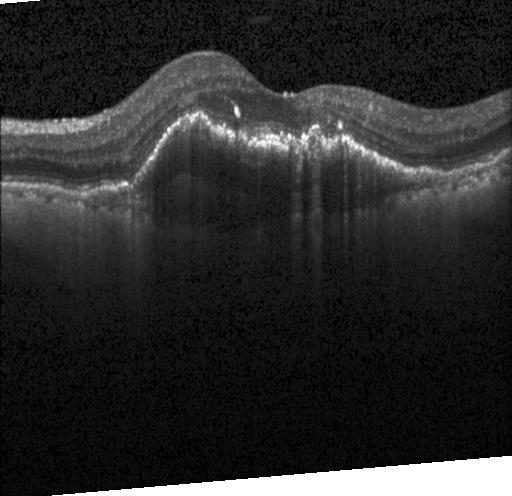

CNV
D:\Documents\flatiron\final project 5\OCT2017\OCT2017\test\DME
CNV-2192440-2.jpeg


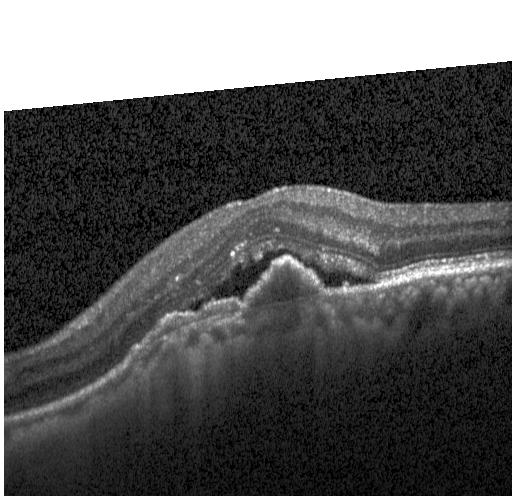

DME
D:\Documents\flatiron\final project 5\OCT2017\OCT2017\test\DME
DME-30521-5.jpeg


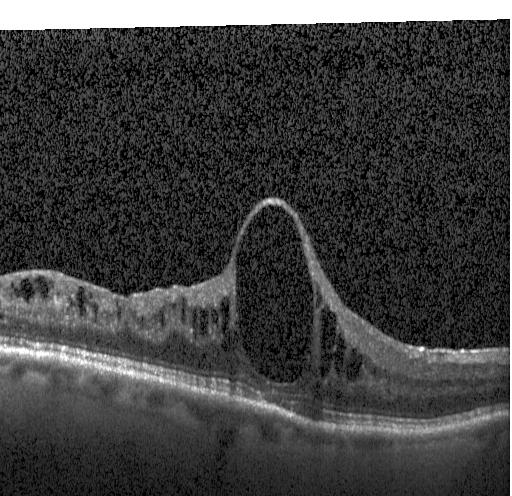

DRUSEN
D:\Documents\flatiron\final project 5\OCT2017\OCT2017\test\DME
DRUSEN-2128644-1.jpeg


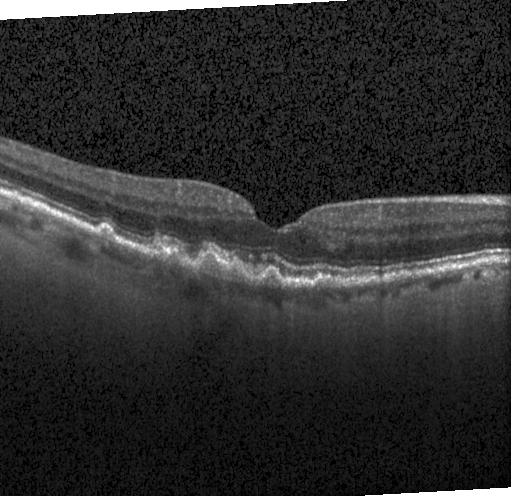

DRUSEN
D:\Documents\flatiron\final project 5\OCT2017\OCT2017\test\DME
DRUSEN-2403178-1.jpeg


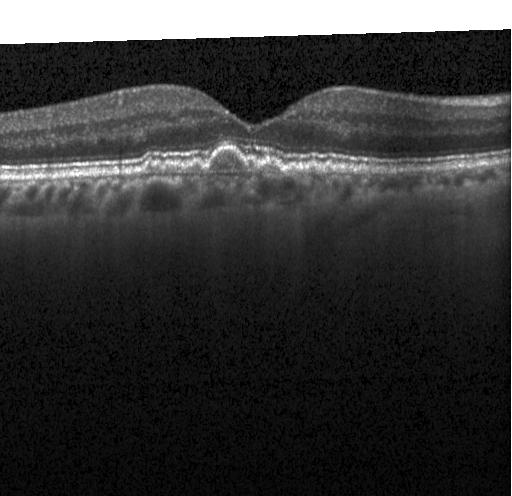

DRUSEN
D:\Documents\flatiron\final project 5\OCT2017\OCT2017\test\DME
DRUSEN-8086850-1.jpeg


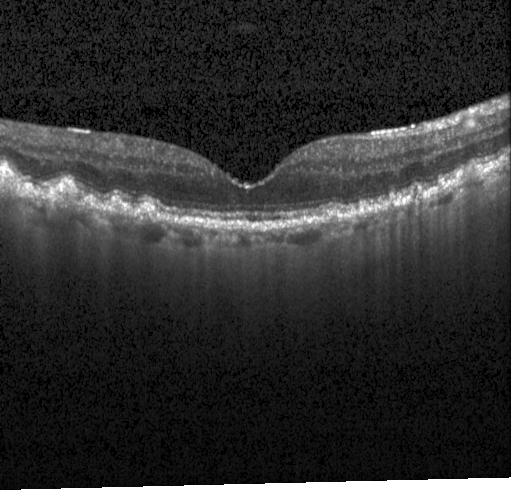

CNV
D:\Documents\flatiron\final project 5\OCT2017\OCT2017\test\DME
CNV-103044-9.jpeg


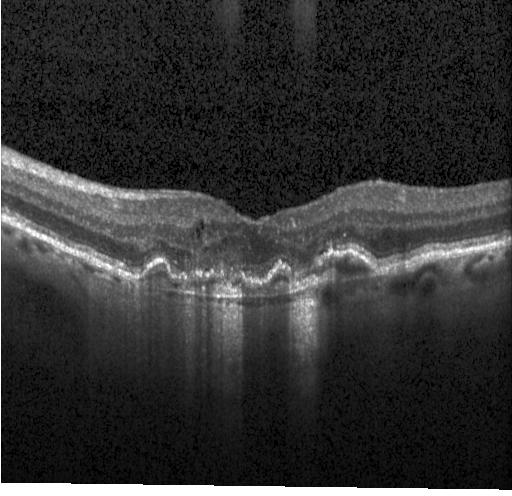

DRUSEN
D:\Documents\flatiron\final project 5\OCT2017\OCT2017\test\DME
DRUSEN-2403178-5.jpeg


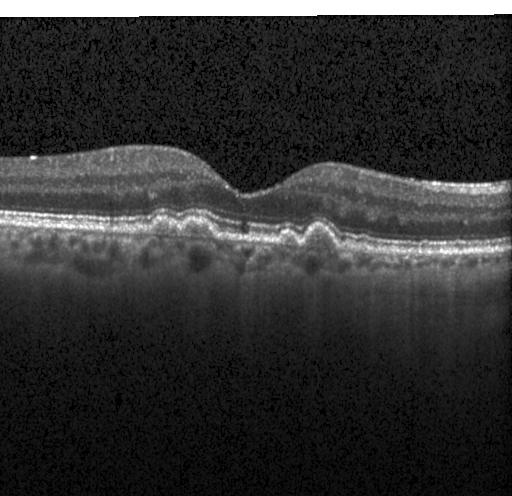

In [108]:
# Randomly choose images to display
n=1
while n < 10:
    one = os.path.realpath(test_folder)
    random_folder=random.choice(os.listdir(test_folder))
    print(random_folder)
    folder = one + "\\" + random_folder
    print(filepath)
    a = random.choice(os.listdir(folder))
    print(a)
    file = folder+"\\"+a
    display(Image.open(file))
    n+=1

As a final check we display a random assortment of images from the test set

###### Preparing the Model

In [7]:
test_generator = ImageDataGenerator(rescale=1./255,horizontal_flip=True).flow_from_directory(
    test_folder,class_mode="categorical")

datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255,horizontal_flip=True)

train_generator = datagen.flow_from_directory(train_folder,subset="training",batch_size=10750,class_mode="categorical")

val_generator = datagen.flow_from_directory(train_folder,subset="validation",batch_size=3000,class_mode="categorical")

# 10750, 3000

Found 1000 images belonging to 4 classes.
Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.


In [8]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [9]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

train_labels[0]

Number of training samples: 10750
Number of testing samples: 32
Number of validation samples: 3000
train_images shape: (10750, 256, 256, 3)
train_labels shape: (10750, 4)
test_images shape: (32, 256, 256, 3)
test_labels shape: (32, 4)
val_images shape: (3000, 256, 256, 3)
val_labels shape: (3000, 4)


array([1., 0., 0., 0.], dtype=float32)

In [10]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(10750, 196608)
(32, 196608)
(3000, 196608)


In [11]:
train_y = train_labels
test_y = test_labels
val_y = val_labels

### Baseline Model

Using Keras, we built a fully connected (Dense) layer network

Our model ended up with 6 layers after basic manipulation and testing, starting at 200 units going down to 12 with relu activations. Our final layer contains 4 units representing the four possible outcomes, using a softmax activation due to our model attempting to identify a categorical outcome.

In [12]:
model = models.Sequential()
model.add(layers.Dense(200, activation='relu', input_dim=196608))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               39321800  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 52        
Total params: 39,348,589
Trainable params: 39,348,589
Non-trainable params: 0
________________________________________________________________

###### Compile and train the Model

In the compiler, we passed an optimizer, loss function, and specified our desired metrics. We trained the model for 25 epochs. These specific parameters were chosen due to testing not recorded which resulted in more efficient/ accurate results.

Using a ModelCheckpoint, we're able to save the best model recorded through each iteration

In [14]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callback = keras.callbacks.ModelCheckpoint("modelbase.hdf5", monitor='val_loss', verbose=2, save_best_only=True, save_weights_only=False, mode='auto', period=1)

model1 = model.fit(train_img,
                    train_y,
                    epochs=25,
                    callbacks = [callback],
                    validation_data=(val_img, val_y))

Train on 10750 samples, validate on 3000 samples
Epoch 1/25
10750/10750 [==============================] - 150s 14ms/step - loss: 1.2210 - acc: 0.4587 - val_loss: 1.1987 - val_acc: 0.4803

Epoch 00001: val_loss improved from inf to 1.19866, saving model to modelbase.hdf5
Epoch 2/25
10750/10750 [==============================] - 130s 12ms/step - loss: 1.1698 - acc: 0.5005 - val_loss: 1.1771 - val_acc: 0.5167

Epoch 00002: val_loss improved from 1.19866 to 1.17713, saving model to modelbase.hdf5
Epoch 3/25
10750/10750 [==============================] - 118s 11ms/step - loss: 1.1366 - acc: 0.5343 - val_loss: 1.1427 - val_acc: 0.5237

Epoch 00003: val_loss improved from 1.17713 to 1.14274, saving model to modelbase.hdf5
Epoch 4/25
10750/10750 [==============================] - 120s 11ms/step - loss: 1.1012 - acc: 0.5530 - val_loss: 1.0589 - val_acc: 0.5967

Epoch 00004: val_loss improved from 1.14274 to 1.05885, saving model to modelbase.hdf5
Epoch 5/25
10750/10750 [=======================

In [15]:
results_train = model.evaluate(train_img, train_y)

10750/10750 [==============================] - 22s 2ms/step


In [16]:
results_test = model.evaluate(test_img, test_y)

32/32 [==============================] - 0s 8ms/step


In [17]:
results_train

[0.4641662552079489, 0.8388837209080541]

In [18]:
results_test

[1.246732234954834, 0.46875]

Using this basic model as a baseline, we're able to assess the time and effort needed to improve on our efforts. We were able to achieve 83% accuracy on our train data, and 46% on our test data.

##### Plotting the Results

We plotted the training and validation loss in one plot

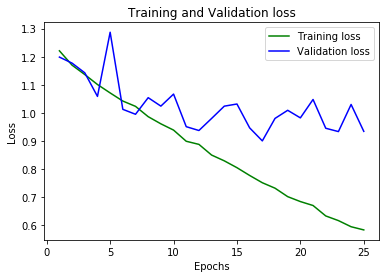

In [19]:
plt.clf()


model_val_dict = model1.history
loss_values = model_val_dict["loss"]
val_loss_values= model_val_dict["val_loss"]

epochs = range(1,len(loss_values) + 1)
plt.plot(epochs, loss_values, "g", label="Training loss")
plt.plot(epochs, val_loss_values, "blue", label="Validation loss")

plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Here we plot the training accurary with the validation accuracy

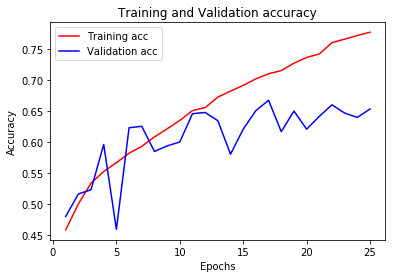

In [20]:
plt.clf()

acc_values = model_val_dict["acc"]
val_acc_values = model_val_dict["val_acc"]

plt.plot(epochs, acc_values, "r", label="Training acc")
plt.plot(epochs, val_acc_values, "blue", label="Validation acc")

plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Although the accuracy and loss of the training set gets better with each epoch, the effectiveness is lost as the model progresses with the validation set. Through our testing, 25 epochs returns the best results while still being able to see improvement.

### Convolutional Neural Network

Here we introduced our convolutional neural network. The convolution step function Conv2d and pooling function are used, as well as additional dropout layers.

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256 ,256,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(4 , activation='softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 115200)            0         
__________

In [22]:
#CNN Model
callback = keras.callbacks.ModelCheckpoint("modelcnn.hdf5", monitor='val_loss', verbose=2, save_best_only=True, save_weights_only=False, mode='auto', period=1)

#Reduced epochs to 6 due to runtime of CNN
model2 = model.fit(train_images,
                    train_y,
                    epochs=6,
                    callbacks = [callback],
                    validation_data=(val_images, val_y))

Train on 10750 samples, validate on 3000 samples
Epoch 1/6
10750/10750 [==============================] - 1252s 116ms/step - loss: 1.0891 - acc: 0.5806 - val_loss: 0.8496 - val_acc: 0.6903

Epoch 00001: val_loss improved from inf to 0.84958, saving model to modelcnn.hdf5
Epoch 2/6
10750/10750 [==============================] - 1244s 116ms/step - loss: 0.7986 - acc: 0.7025 - val_loss: 0.7251 - val_acc: 0.7163

Epoch 00002: val_loss improved from 0.84958 to 0.72507, saving model to modelcnn.hdf5
Epoch 3/6
10750/10750 [==============================] - 1251s 116ms/step - loss: 0.6720 - acc: 0.7526 - val_loss: 0.6900 - val_acc: 0.7313

Epoch 00003: val_loss improved from 0.72507 to 0.68996, saving model to modelcnn.hdf5
Epoch 4/6
10750/10750 [==============================] - 1242s 116ms/step - loss: 0.5976 - acc: 0.7803 - val_loss: 0.6519 - val_acc: 0.7613

Epoch 00004: val_loss improved from 0.68996 to 0.65189, saving model to modelcnn.hdf5
Epoch 5/6
10750/10750 [========================

In [23]:
results_train = model.evaluate(train_images, train_y)

10750/10750 [==============================] - 332s 31ms/step


In [24]:
results_test = model.evaluate(test_images, test_y)

32/32 [==============================] - 1s 38ms/step


In [25]:
results_train

[0.44134678234055985, 0.8383255814286166]

In [26]:
results_test

[0.8179011344909668, 0.6875]

With our Convolutional Neural Network, we we're able to obtain 68% accuracy on our test set while maintaining 83% accuracy with the training set. Although this is an incremental change, the effort required to achieve this increase is computationally exponential.

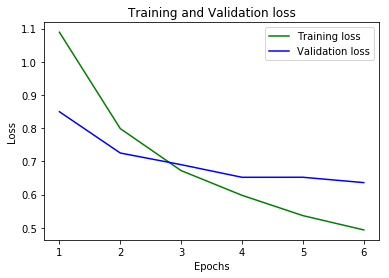

In [27]:
plt.clf()

import matplotlib.pyplot as plt
model2_val_dict = model2.history
loss_values2 = model2_val_dict["loss"]
val_loss_values2= model2_val_dict["val_loss"]

epochs = range(1,len(loss_values2) + 1)
plt.plot(epochs, loss_values2, "g", label="Training loss")
plt.plot(epochs, val_loss_values2, "blue", label="Validation loss")

plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

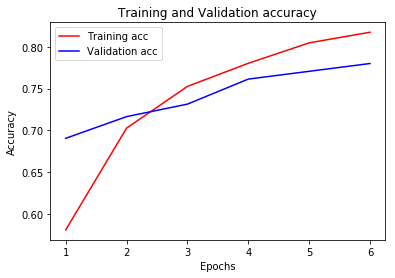

In [28]:
plt.clf()

acc_values2 = model2_val_dict["acc"]
val_acc_values2 = model2_val_dict["val_acc"]

plt.plot(epochs, acc_values2, "r", label="Training acc")
plt.plot(epochs, val_acc_values2, "blue", label="Validation acc")

plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

On our second model, we notice the same reduction in returns at a certain number of epochs. Our model is unable to learn as effectively and will require more time and more computational power to achieve a slight increase in accuracy. These efforts aren't recognizable with the time constraints of this project. Instead we'll opt for transfer learning through a pretrained network.

### Pretrained Network

A pretrained network is a network which was previously ran on a large, general dataset, and saved. The advantage is that the hierarchial features learned by this network can act as a generic model, and can be used for a wide variety of computer vision tasks, even if your new problem involes completely different classes of images.

Here we'll be using the pretrained network "VGG19".

In [29]:
from keras.applications import VGG19
cnn_base = VGG19(weights="imagenet",
                include_top=False,
                input_shape=(256,256,3))

In [30]:
#Define Model Architecture
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

Again, like our other models, we used an assortment of dense layers with relu activations to create our model. The difference for this model will be that our pretrained model will be added before hand to create the initial generalizations.

In [31]:
cnn_base.trainable = False

#You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute:
for layer in model.layers:
    print(layer.name, layer.trainable)
    
#Similarly, we can check how many trainable weights are in the model:
print(len(model.trainable_weights))

model.summary()

vgg19 False
flatten_2 True
dense_9 True
dense_10 True
dense_11 True
dense_12 True
dense_13 True
10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 8, 8, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2097216   
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
___________________________________________

Instead of extracting bottlenecks and freezing our weights, we used the entire pretrained network and ran our final model. Although this is time consuming, it can result in a more accurate model. Running our model through 10 epochs allowed us to maintain a runtime manageable for this project while yeilding promising results.

In [32]:
#Compilation
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

callback = keras.callbacks.ModelCheckpoint("transfer.hdf5", monitor='val_loss', verbose=2, save_best_only=True, save_weights_only=False, mode='auto', period=1)

#Fitting the Model
model3 = model.fit(
    train_images,
    train_y,
    callbacks = [callback],
    epochs = 10,
    validation_data=(val_images, val_y))

Train on 10750 samples, validate on 3000 samples
Epoch 1/10
10750/10750 [==============================] - 6462s 601ms/step - loss: 0.9266 - acc: 0.6683 - val_loss: 0.7134 - val_acc: 0.7383
Epoch 2/10
10750/10750 [==============================] - 6447s 600ms/step - loss: 0.6511 - acc: 0.7507 - val_loss: 0.6220 - val_acc: 0.7700
Epoch 3/10
10750/10750 [==============================] - 6459s 601ms/step - loss: 0.5487 - acc: 0.7940 - val_loss: 0.5051 - val_acc: 0.8033
Epoch 4/10
10750/10750 [==============================] - 6474s 602ms/step - loss: 0.4837 - acc: 0.8239 - val_loss: 0.4696 - val_acc: 0.8300
Epoch 5/10
10750/10750 [==============================] - 6481s 603ms/step - loss: 0.4399 - acc: 0.8406 - val_loss: 0.4663 - val_acc: 0.8330
Epoch 6/10
10750/10750 [==============================] - 6482s 603ms/step - loss: 0.4061 - acc: 0.8556 - val_loss: 0.4302 - val_acc: 0.8407
Epoch 7/10
10750/10750 [==============================] - 6479s 603ms/step - loss: 0.3793 - acc: 0.8627 -

In [33]:
results_train = model.evaluate(train_images, train_y)

10750/10750 [==============================] - 5051s 470ms/step


In [34]:
results_test = model.evaluate(test_images, test_y)

32/32 [==============================] - 15s 476ms/step


In [35]:
results_train

[0.30644390912388647, 0.887069767464039]

In [36]:
results_test

[0.42010611295700073, 0.78125]

Our final model, trained with a pretrained network, was able to obtain 78% accuracy on our test set while also increasing our training sets accuracy to 88%. 

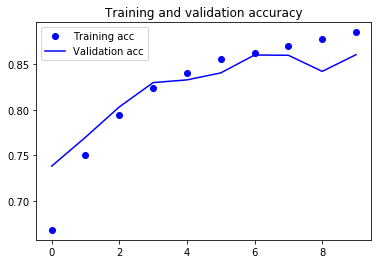

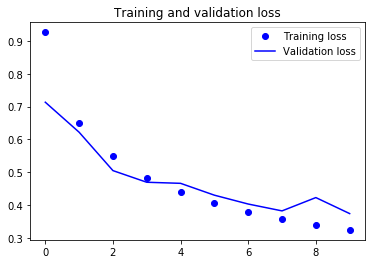

In [37]:
#visualize the training / validation history associated with fitting the model.

import matplotlib.pyplot as plt
%matplotlib inline 

acc = model3.history['acc']
val_acc = model3.history['val_acc']
loss = model3.history['loss']
val_loss = model3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Conclusions and Recommendations

#### Final Model Evaluation And Interpretation

Our final model was able to achieve an accuracy of 78% through transfer learning. The specific use case for this set of data was to be able to catch retinal conditions in their early stages, which our model does fairly effectively. Some alterations for future iterations of the project could include testing multiple pretrained networks to see which (if any) would be more effective than VGG19. Another alteration could be freezing the weights and extracting bottleneck features, which would save time at the cost of potentially reducing accuracy. The conditions we focused on aren't in need of dire diagnoses, so allowing the model to run longer than allowed in this iteration of the project could yeild increased accuracy, while still making it useful in a real world case scenario.